In [1]:
# Importing the required libraries
import os
import cv2 #OpenCV is a huge open-source library for computer vision, machine learning, and image processing. It can process images and videos to identify objects, faces, or even the handwriting of a human.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 

In [2]:
#Reading thr different image folders in the dataset
DATASET_DIR = './101_ObjectCategories/'

In [3]:
#Total number of folders in the 101 Object classification dataset
folder_names = []
folder_names = [f for f in sorted(os.listdir(DATASET_DIR))]

print(len(folder_names))

#there are 102 different image folders

102


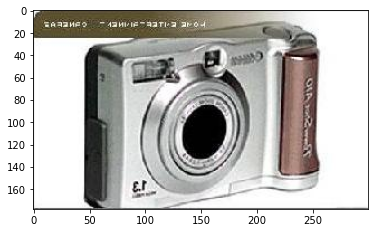

In [4]:
#Looking at camera category image
image_path = os.path.join(DATASET_DIR, 'camera/image_0002.jpg')
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()

In [5]:
print(image.shape)

(178, 300, 3)


# Randomly choosing 9 categories

In [6]:
categories_num = 9
images_number = 9 
categories_selected = np.random.randint(0, 101, categories_num, dtype = 'l')
# L denotes the long Python type used to represent integers of unbounded width

print('Selected categories:')
print([folder_names[i] for i in categories_selected])

Selected categories:
['flamingo', 'revolver', 'ibis', 'mandolin', 'starfish', 'platypus', 'rhino', 'cannon', 'minaret']


<ipython-input-7-a31f6a835c88>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


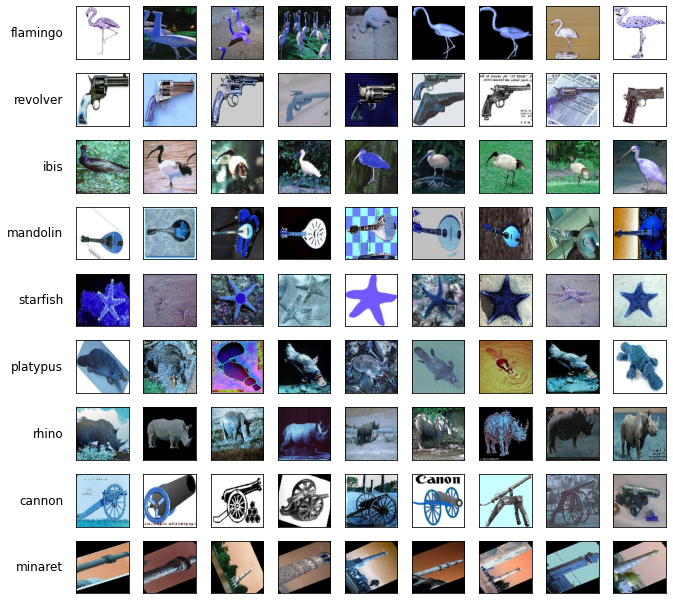

In [7]:
fig, ax = plt.subplots(nrows = 9, ncols = 9)
fig.set_size_inches(9.5, 8.5)
fig.subplots_adjust(wspace=0.1,hspace=0.1)


for i, category in enumerate(categories_selected):
  folder_path = os.path.join(DATASET_DIR, folder_names[category])
  image_names = [img for img in sorted(os.listdir(folder_path))][:images_number]
    
  for j, image_name in enumerate(image_names):
    image_path = os.path.join(folder_path, image_name)

    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100)) 

    ax[i,j].imshow(image)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    
    if j == 0:
      pad = 5 
      ax[i,j].annotate(folder_names[category], 
                       xy = (0, 0.5), 
                       xytext = (-ax[i,j].yaxis.labelpad - pad, 0), 
                       xycoords = ax[i,j].yaxis.label, 
                       textcoords = 'offset points',
                       size = 'large', 
                       ha = 'right', 
                       va ='center'
                       )
      
      
fig.tight_layout()
fig.show()

# Count of Images

In [8]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

In [9]:
for i, category in enumerate(folder_names):
  category_dict[i] = category
  
  folder_path = os.path.join(DATASET_DIR, category)
  image_names = [img for img in sorted(os.listdir(folder_path))]
  
  images_per_category_dict[i] = len(image_names)
  category_images_path_dict[i] = image_names
  
  print('{0}: {1}'.format(category, images_per_category_dict[i]))
  total_images += images_per_category_dict[i]
    
    
print('Total images in dataset: {}'.format(total_images))

BACKGROUND_Google: 468
Faces: 435
Faces_easy: 435
Leopards: 200
Motorbikes: 798
accordion: 55
airplanes: 800
anchor: 42
ant: 42
barrel: 47
bass: 54
beaver: 46
binocular: 33
bonsai: 128
brain: 98
brontosaurus: 43
buddha: 85
butterfly: 91
camera: 50
cannon: 43
car_side: 123
ceiling_fan: 47
cellphone: 59
chair: 62
chandelier: 107
cougar_body: 47
cougar_face: 69
crab: 73
crayfish: 70
crocodile: 50
crocodile_head: 51
cup: 57
dalmatian: 67
dollar_bill: 52
dolphin: 65
dragonfly: 68
electric_guitar: 75
elephant: 64
emu: 53
euphonium: 64
ewer: 85
ferry: 67
flamingo: 67
flamingo_head: 45
garfield: 34
gerenuk: 34
gramophone: 51
grand_piano: 99
hawksbill: 100
headphone: 42
hedgehog: 54
helicopter: 88
ibis: 80
inline_skate: 31
joshua_tree: 64
kangaroo: 86
ketch: 114
lamp: 61
laptop: 81
llama: 78
lobster: 41
lotus: 66
mandolin: 43
mayfly: 40
menorah: 87
metronome: 32
minaret: 76
nautilus: 55
octopus: 35
okapi: 39
pagoda: 47
panda: 38
pigeon: 45
pizza: 53
platypus: 34
pyramid: 57
revolver: 82
rhino: 

Conclusion
While the dataset contains 101 cateories of everyday objects, it contains surprisingly few images. 9145 in total.
The main challenges in Caltech-101 arise due to its less number of images per category (averaging aroung 50). The advantage is that due to its small size, it is easier to experiment upon.

In [10]:
import os
import shutil
#Shutil module offers high-level operation on a file like a copy, create, and remote operation on the file. 
#It comes under Python’s standard utility modules. 
#This module helps in automating the process of copying and removal of files and directories.
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers

from keras.applications.vgg16 import VGG16 
#VGG-16 is a convolutional neural network that is 16 layers deep. 
#A pretrained version of the network trained on more than a million images from the ImageNet database can be loaded.
#The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. 
#As a result, the network has learned rich feature representations for a wide range of images. 
#The network has an image input size of 224-by-224.
from keras.applications.resnet50 import ResNet50
#ResNet-50 is a convolutional neural network that is 50 layers deep.
from keras.preprocessing.image import ImageDataGenerator
#It lets you augment your images in real-time while your model is still training

# Splitting into training, validation and test data

In [11]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i, category in enumerate(folder_names):
    category_dict[i] = category
    
    folder_path = DATASET_DIR + '/' + category
    image_names = [img for img in sorted(os.listdir(folder_path))]
    
    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names
    
    total_images += images_per_category_dict[i]

In [14]:
#Defining different variables for train, validation and test data 
base_path = './split_dataset'

train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test')

In [15]:
#used to create a new folder
base_path = './split_dataset'
os.mkdir(base_path)

train_dir = os.path.join(base_path, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_path, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_path, 'test')
os.mkdir(test_dir)

In [16]:
for directory in [train_dir, validation_dir, test_dir]:
    for category in folder_names:
        os.mkdir(os.path.join(directory, category))

In [17]:
total_train = 0
total_validation = 0
total_test = 0

total_train_2 = 0
total_validation_2 = 0
total_test_2 = 0


for i, category in enumerate(folder_names):
    train_number = int(0.7 * images_per_category_dict[i])
    validation_number = int(0.2 * images_per_category_dict[i])
    test_number = images_per_category_dict[i] - train_number - validation_number 

    total_train += train_number
    total_validation += validation_number
    total_test += test_number
  

    fnames = category_images_path_dict[i][:train_number] #0 to 70% data has been selected
    for fname in fnames:
        src = os.path.join(DATASET_DIR, category, fname)
        dst = os.path.join(train_dir, category, fname)
        shutil.copyfile(src, dst)

    total_train_2 += len(fnames)
      

    fnames = category_images_path_dict[i][train_number:train_number + validation_number] #70% to 90% data has been selected
    for fname in fnames:
        src = os.path.join(DATASET_DIR, category, fname)
        dst = os.path.join(validation_dir, category, fname)
        shutil.copyfile(src, dst)

    total_validation_2 += len(fnames)
  

    fnames = category_images_path_dict[i][train_number + validation_number:] #90% to 100% data has been selected
    for fname in fnames:
        src = os.path.join(DATASET_DIR, category, fname)
        dst = os.path.join(test_dir, category, fname)
        shutil.copyfile(src, dst)

    total_test_2 += len(fnames)

In [18]:
print('Correct train split: ', total_train == total_train_2)
print('Correct validation split: ', total_validation == total_validation_2)
print('Correct test split: ', total_test == total_test_2)
print()
print('Number of training images: ', total_train)
print('Number of validation images: ', total_validation)
print('Number of test images: ', total_test)
print()
print('Real percentage of training images: ', total_train / total_images)
print('Real percentage of validation images: ', total_validation / total_images)
print('Real percentage of test images: ', total_test / total_images)

Correct train split:  True
Correct validation split:  True
Correct test split:  True

Number of training images:  6353
Number of validation images:  1788
Number of test images:  1004

Real percentage of training images:  0.6946965554948059
Real percentage of validation images:  0.19551667577911427
Real percentage of test images:  0.10978676872607983


# Passing data through Pre-Trained Model

In [19]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3)) #width, height, rgb ???????????
#'imagenet' (pre-training on ImageNet)

In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20 #????

In [22]:
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512)) 
    #The size of the first numpy array is: sample size * 4 * 4 * 512, corresponding to the size of the network output
    labels = np.zeros(shape = (sample_count, 102))
    #the label is naturally only one-dimensional array of sample size.
    generator = datagen.flow_from_directory(directory, 
                                          target_size = (150, 150),
                                          batch_size = batch_size,
                                          class_mode = 'categorical'
                                          )
  

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch

        i += 1
        if i * batch_size >= sample_count:
              break


    return features, labels

In [23]:
train_features, train_labels = extract_features(train_dir, 6353)
validation_features, validation_labels = extract_features(validation_dir, 1788)
test_features, test_labels = extract_features(test_dir, 1003)

Found 6353 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
Found 1003 images belonging to 102 classes.


In [24]:
train_features = np.reshape(train_features, (6353, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1788, 4 * 4 * 512))
test_features = np.reshape(test_features, (1003, 4 * 4 * 512))

# Building the Model

In [25]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(102, activation = 'softmax'))

In [26]:
model.compile(optimizer = optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['acc']
              )

In [27]:
history = model.fit(train_features, train_labels, 
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels)
                    )

Epoch 1/30
318/318 [==============================] - 6s 20ms/step - loss: 2.2988 - acc: 0.5009 - val_loss: 1.1979 - val_acc: 0.7204
Epoch 2/30
318/318 [==============================] - 6s 20ms/step - loss: 1.1159 - acc: 0.7071 - val_loss: 0.8640 - val_acc: 0.7819
Epoch 3/30
318/318 [==============================] - 6s 20ms/step - loss: 0.7771 - acc: 0.7905 - val_loss: 0.8141 - val_acc: 0.7864
Epoch 4/30
318/318 [==============================] - 6s 20ms/step - loss: 0.5869 - acc: 0.8341 - val_loss: 0.7297 - val_acc: 0.8082
Epoch 5/30
318/318 [==============================] - 6s 20ms/step - loss: 0.4722 - acc: 0.8594 - val_loss: 0.6762 - val_acc: 0.8194
Epoch 6/30
318/318 [==============================] - 6s 20ms/step - loss: 0.3871 - acc: 0.8829 - val_loss: 0.8142 - val_acc: 0.7936
Epoch 7/30
318/318 [==============================] - 6s 20ms/step - loss: 0.3363 - acc: 0.8958 - val_loss: 0.7435 - val_acc: 0.8205
Epoch 8/30
318/318 [==============================] - 6s 20ms/step - 

In [28]:
def plot_training_graph(hist_obj):
    acc = hist_obj.history['acc']
    val_acc = hist_obj.history['val_acc']
    loss = hist_obj.history['loss']
    val_loss = hist_obj.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()


    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

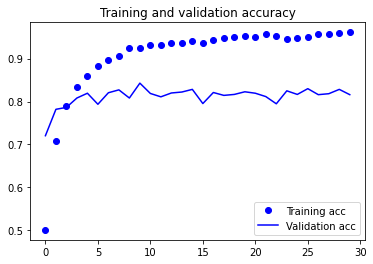

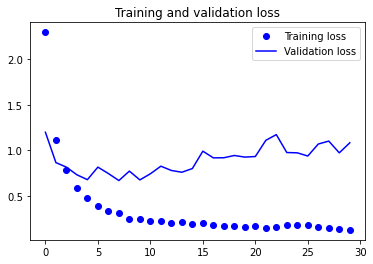

In [29]:
plot_training_graph(history)

# Fine Tuning

In [30]:
# Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                   )

In [31]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'categorical'
                                                    )

Found 6353 images belonging to 102 classes.


In [33]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'categorical'
                                                        )

Found 1788 images belonging to 102 classes.


# Building the model

In [34]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(102, activation = 'softmax'))

In [35]:
conv_base.trainable = False

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_3 (Dense)              (None, 102)               52326     
Total params: 18,961,830
Trainable params: 4,247,142
Non-trainable params: 14,714,688
_________________________________________________________________


In [37]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(),
              metrics = ['acc']
              )

In [40]:
history = model.fit(train_generator,
                    steps_per_epoch = 50,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = 80,
                    verbose = 2
                    )

Epoch 1/10
50/50 - 433s - loss: 0.7464 - acc: 0.7840 - val_loss: 0.8278 - val_acc: 0.7862
Epoch 2/10
50/50 - 511s - loss: 0.7871 - acc: 0.7780 - val_loss: 0.8068 - val_acc: 0.7900
Epoch 3/10
50/50 - 508s - loss: 0.7956 - acc: 0.7734 - val_loss: 0.8412 - val_acc: 0.7806
Epoch 4/10
50/50 - 515s - loss: 0.7680 - acc: 0.7880 - val_loss: 0.8773 - val_acc: 0.7669
Epoch 5/10
50/50 - 427s - loss: 0.7817 - acc: 0.7830 - val_loss: 0.8692 - val_acc: 0.7700
Epoch 6/10
50/50 - 396s - loss: 0.6593 - acc: 0.8170 - val_loss: 0.8035 - val_acc: 0.7975
Epoch 7/10
50/50 - 413s - loss: 0.6906 - acc: 0.8060 - val_loss: 0.8691 - val_acc: 0.7744
Epoch 8/10
50/50 - 389s - loss: 0.7097 - acc: 0.7900 - val_loss: 0.9119 - val_acc: 0.7631
Epoch 9/10
50/50 - 390s - loss: 0.7731 - acc: 0.7774 - val_loss: 0.9126 - val_acc: 0.7619
Epoch 10/10
50/50 - 405s - loss: 0.7380 - acc: 0.7810 - val_loss: 0.8804 - val_acc: 0.7744


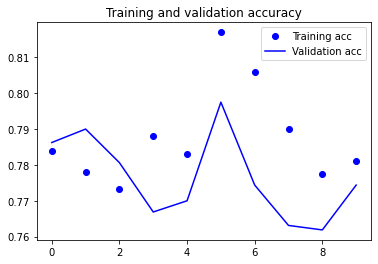

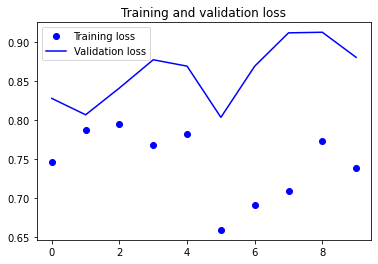

In [41]:
plot_training_graph(history)

# Further fine tuning (training the final conv base)

In [42]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True

    if set_trainable:
        layer.trainable = True
    
    else:
        layer.trainable = False

In [43]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 1e-5),
              metrics = ['acc']
              )

In [44]:
history = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 5,
                    validation_data = validation_generator, 
                    validation_steps = 80
                    )

Epoch 1/5
20/20 [==============================] - 336s 17s/step - loss: 0.6507 - acc: 0.8150 - val_loss: 0.8363 - val_acc: 0.7781
Epoch 2/5
20/20 [==============================] - 328s 16s/step - loss: 0.5818 - acc: 0.8275 - val_loss: 0.8547 - val_acc: 0.7800
Epoch 3/5
20/20 [==============================] - 334s 17s/step - loss: 0.5350 - acc: 0.8150 - val_loss: 0.7997 - val_acc: 0.7962
Epoch 4/5
20/20 [==============================] - 314s 16s/step - loss: 0.5725 - acc: 0.8250 - val_loss: 0.7958 - val_acc: 0.7931
Epoch 5/5
20/20 [==============================] - 329s 16s/step - loss: 0.6141 - acc: 0.8100 - val_loss: 0.7782 - val_acc: 0.7881


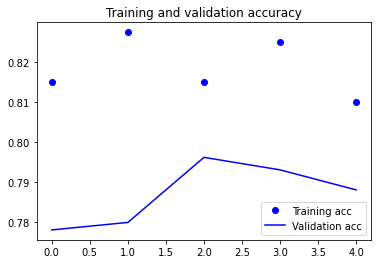

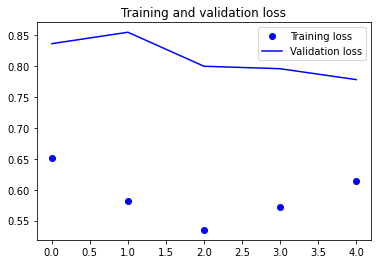

In [45]:
plot_training_graph(history)

# Evaluating on test data

In [46]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = 'categorical'
                                                  )

Found 1003 images belonging to 102 classes.


In [47]:
test_loss, test_acc = model.evaluate(test_generator, steps = 50)
print('Test acc: {}'.format(test_acc))

50/50 [==============================] - 146s 3s/step - loss: 0.8121 - acc: 0.7900
Test acc: 0.7900000214576721


In [48]:
#Conclusion
#The validaton accuracy was 79% when using pre-trained weights directly. It changed to 78.7% when training our own dense layers, and 83.3% when unfreezing and training the final concolution block. The test accuracy we were able to achieve is 83.3%. To improve it further, more data would be required.